In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import DiseaseAnalysis

In [2]:
# Total pop, infection rate, recovery rate, death rate, crossInfectivity, StartInfected, quarantine leak rate, quarantine time
group1 = DiseaseAnalysis.Population(1000, 0.5, 0.1, 0.01, 0.01, True, 0.1, 10)

group2 = DiseaseAnalysis.Population(10000, 0.3, 0.01, 0.01, 0.01, True, 0.1, 10)

In [3]:
S = [group1.S + group2.S]
I = [group1.I + group2.I]
R = [group1.R + group2.R]
D = [group1.D + group2.D]

for i in range(100):
    group1.SIRD()
    group2.SIRD()
    
    DiseaseAnalysis.crossInfect(group1, group2)
    
    S.append(group1.S + group2.S)
    I.append(group1.I + group2.I)
    R.append(group1.R + group2.R)
    D.append(group1.D + group2.D)
    
print(S[-1] + I[-1] + R[-1] + D[-1])

11000.000000000011


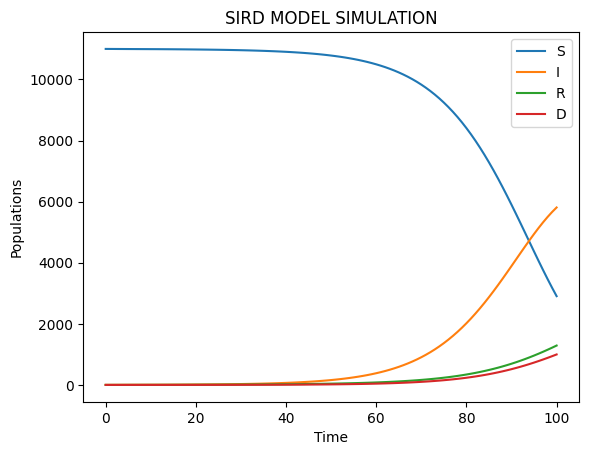

In [4]:
plt.plot(S, label="S")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.plot(D, label="D")
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("SIRD MODEL SIMULATION")
plt.legend()
plt.show()